In [ ]:
# !pip install --upgrade tensorflow
!pip install tensorflow==2.15
!pip install -U tf_keras # Keras 2
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

!pip install transformers datasets tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      S

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from transformers import BertTokenizer, TFBertForSequenceClassification
from datasets import load_dataset, load_metric
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

load_model_path = '/content/drive/My Drive/W266_Final_Project/BERT/Finetune_BERT_QNLI/bert-base-uncased-qnli-final'

Mounted at /content/drive


# Benchmarking BERT Base Uncased on QNLI
- Benchmarking the model that was finetuned on 3 epochs

In [ ]:
# Load BERT BASE UNCASED Finetuned model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertForSequenceClassification.from_pretrained(load_model_path, num_labels=2)

# Load and preprocess the GLUE QNLI dataset
dataset = load_dataset("glue", "qnli")
metric = load_metric("glue", "qnli")

encoded_dataset = dataset.map(lambda examples: tokenizer(examples["question"],
                                                         examples["sentence"],
                                                         truncation=True,
                                                         padding="max_length",
                                                         return_tensors="tf"),
                              batched=True)

# Convert to TensorFlow dataset
validation_data = encoded_dataset["validation"].to_tf_dataset(columns=["attention_mask", "input_ids", "token_type_ids"],
                                                              label_cols=["label"],
                                                              shuffle=False,
                                                              batch_size=32)

# Predict
predictions = model.predict(validation_data)['logits']
pos_probs = tf.nn.softmax(predictions, axis=-1)[:, 1].numpy()
predicted_labels = np.argmax(predictions, axis=1)
true_labels = [example['label'] for example in dataset['validation']]
accuracy = metric.compute(predictions=predicted_labels, references=true_labels)

print('Accuracy of Finetuned BERT BASE UNCASED model on QNLI validation set:', accuracy['accuracy'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/My Drive/W266_Final_Project/BERT/Finetune_BERT_QNLI/bert-base-uncased-qnli-final.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Generating train split:   0%|          | 0/104743 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5463 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5463 [00:00<?, ? examples/s]

<ipython-input-4-4761cb102089>:7: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("glue", "qnli")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for glue contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/glue/glue.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Map:   0%|          | 0/104743 [00:00<?, ? examples/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Map:   0%|          | 0/5463 [00:00<?, ? examples/s]

Map:   0%|          | 0/5463 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:401: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


171/171 [==============================] - 44s 146ms/step
Accuracy of Finetuned BERT BASE UNCASED model on QNLI validation set: 0.8958447739337361


- BERT BASE UNCASED Finetuned model only, Benchmarked on GLUE QNLI for Question Answering
- Ran in Google Colab Pro+ on A100 GPU and High RAM
  - System RAM 3.9GB
  - GPU RAM 4.4GB
  - Ran in 44 seconds
- Accuracy of Finetuned BERT BASE UNCASED model on QNLI validation set: 0.8958447739337361



---



# Analysis

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Performance Evaluation

### Confusion Matrix

[[2524  178]
 [ 391 2370]]


<Axes: >

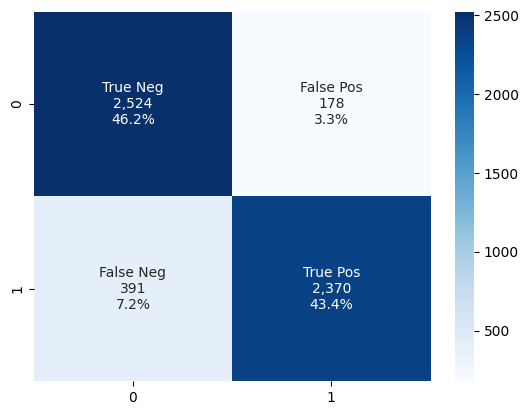

In [ ]:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Confusion_Matrix = confusion_matrix(true_labels, predicted_labels)
print(Confusion_Matrix)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{:,}".format(value) for value in Confusion_Matrix.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in Confusion_Matrix.flatten()/np.sum(Confusion_Matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_Matrix, annot=labels, fmt='', cmap='Blues')



---



### F1 Score, Precision, and Recall

In [ ]:
F1_Score = f1_score(true_labels, predicted_labels)
Precision = precision_score(true_labels, predicted_labels)
Recall = recall_score(true_labels, predicted_labels)

accuracy = accuracy_score(true_labels, predicted_labels)

tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
specificity = tn / (tn + fp)

print("F1 Score:\t", round(F1_Score, 4))
print("Precision:\t", round(Precision, 4))
print("Recall:\t\t", round(Recall, 4))
print("Accuracy:\t", round(accuracy, 4))
print("Specificity:\t", round(specificity, 4))



F1 Score:	 0.8928
Precision:	 0.9301
Recall:		 0.8584
Accuracy:	 0.8958
Specificity:	 0.9341




---



## Error Analysis
- https://dataheroes.ai/blog/improving-machine-learning-models-a-guide-to-error-classification-analysis/
- Per Huggingface guidelines: 0 = Entailment, 1 = Not Entailment

### Error Categorization

In [ ]:
NUM_PRED_ERRORS = 30

error_indices = []
for i in range(len(predicted_labels)):
    if predicted_labels[i] != true_labels[i]:
        error_indices.append(i)

sample_error_indices = np.random.choice(error_indices, size=NUM_PRED_ERRORS, replace=False)

In [ ]:
print("Predicted Labels:\t", "{:,}".format(len(predicted_labels)))
print("True Labels:\t\t", "{:,}".format(len(true_labels)))
print("Error Indices:\t\t", "{:,}".format(len(error_indices)))

Predicted Labels:	 5,463
True Labels:		 5,463
Error Indices:		 569


#### Question Types Struggles

In [ ]:
len(dataset['validation']['question'])

5463

In [ ]:
dataset['validation']['question'][:10]

['What came into force after the new constitution was herald?',
 'What is the first major city in the stream of the Rhine?',
 'What is the minimum required if you want to teach in Canada?',
 "How was Temüjin kept imprisoned by the Tayichi'ud?",
 'What did Herr Gott, dich loben wir become known as ?',
 'What year did the the case go before the supreme court?',
 'What does UMC stand for?',
 'What is the name of the professional skateboarder that lives in southern California?',
 "Where did Temüjin hide during his escape from the Tayichi'ud?",
 'What are the most active parts of ctenophora?']

In [ ]:
# First word of each question
first_word = []
word_counts = []
for question in dataset['validation']['question']:
    words = question.split()[:1]
    first_word.append(words)
    first_word.sort()
    word_count = len(question.split())
    word_counts.append(word_count)


# Questions with incorrectly predicted answers
incorrect_predictions = []
for i in range(len(predicted_labels)):
    if predicted_labels[i] != true_labels[i]:
        incorrect_predictions.append(i)

# First word of all the incorrect predictions
incorrect_predictions_first_word = []
for i in incorrect_predictions:
    incorrect_predictions_first_word.append(first_word[i])

In [ ]:
len(incorrect_predictions_first_word)

569

In [ ]:
first_word_df = pd.DataFrame(incorrect_predictions_first_word, columns=["First_Word"])
first_word_df = first_word_df.groupby(["First_Word"]).size().sort_values(ascending=False).head(10)
error_types = pd.DataFrame(first_word_df, columns=["Error Count"])
error_types

,Error Count
First_Word,
What,251
How,62
Who,53
When,41
Where,26
Which,26
In,17
The,12
Why,7


In [ ]:
error_types["Pct of Total Errors"] = round(error_types["Error Count"] / len(dataset['validation']['question']) * 100, 2)
error_types["Pct of Total Errors"] = error_types["Pct of Total Errors"].apply(lambda x: f"{x}%")
error_types

,Error Count,Pct of Total Errors
First_Word,,
What,251,4.59%
How,62,1.13%
Who,53,0.97%
When,41,0.75%
Where,26,0.48%
Which,26,0.48%
In,17,0.31%
The,12,0.22%
Why,7,0.13%


#### Answer Length Struggles

##### Incorrect Predictions

,Error_Predictions_Question_Word_Count,Frequency
18,3,3
12,4,12
7,5,30
6,6,40
2,7,65
0,8,73
1,9,67
3,10,59
4,11,54
5,12,43


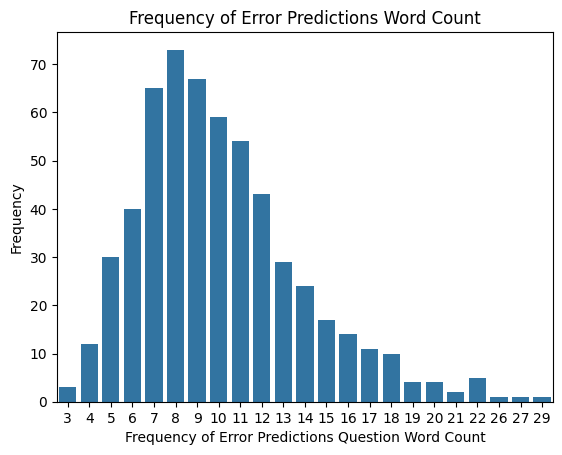

In [ ]:
word_count_freq = []
for i in incorrect_predictions:
    word_count_freq.append(word_counts[i])

word_count_freq_df = pd.DataFrame(word_count_freq, columns=["Error_Predictions_Question_Word_Count"])

word_count_freq_df = word_count_freq_df['Error_Predictions_Question_Word_Count'].value_counts().reset_index()
word_count_freq_df.columns = ['Error_Predictions_Question_Word_Count', 'Frequency']

word_count_freq_df = word_count_freq_df.sort_values(by='Error_Predictions_Question_Word_Count')

display(word_count_freq_df)

sns.barplot(x='Error_Predictions_Question_Word_Count', y='Frequency', data=word_count_freq_df)
plt.xlabel('Frequency of Error Predictions Question Word Count')
plt.ylabel('Frequency')
plt.title('Frequency of Error Predictions Word Count')
plt.show()

##### Correct Predictions

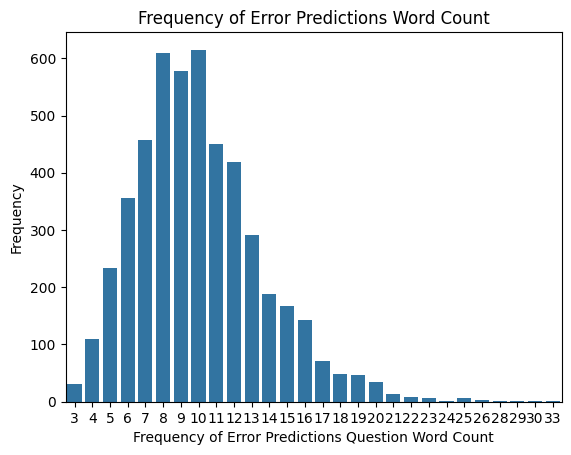

In [ ]:
correct_predictions = []
for i in range(len(predicted_labels)):
    if predicted_labels[i] == true_labels[i]:
        correct_predictions.append(i)

word_count_freq = []
for i in correct_predictions:
    word_count_freq.append(word_counts[i])

word_count_freq_df = pd.DataFrame(word_count_freq, columns=["Error_Predictions_Question_Word_Count"])

word_count_freq_df = word_count_freq_df['Error_Predictions_Question_Word_Count'].value_counts().reset_index()
word_count_freq_df.columns = ['Error_Predictions_Question_Word_Count', 'Frequency']

word_count_freq_df = word_count_freq_df.sort_values(by='Error_Predictions_Question_Word_Count')

sns.barplot(x='Error_Predictions_Question_Word_Count', y='Frequency', data=word_count_freq_df)
plt.xlabel('Frequency of Error Predictions Question Word Count')
plt.ylabel('Frequency')
plt.title('Frequency of Error Predictions Word Count')
plt.show()

#### Manual Error Categorization

In [ ]:
print("Sample Errors:\n\n")

for i in sample_error_indices:
    print(f"Index:\t\t {i}")
    print(f"Question:\t {dataset['validation'][int(i)]['question']}")
    print(f"Answer:\t\t {dataset['validation'][int(i)]['sentence']}")
    print(f"True Label:\t {true_labels[i]}")
    print(f"Predicted Label: {predicted_labels[i]}")
    print("----------------------------------------------------------------------------\n\n")

Sample Errors:


Index:		 1792
Question:	 What advancements besides military technology did Europe achieve?
Answer:		 European chemists made deadly explosives that could be used in combat, and with innovations in machinery they were able to manufacture improved firearms.
True Label:	 1
Predicted Label: 0
----------------------------------------------------------------------------


Index:		 421
Question:	 The first episode of Doctor Who premiered the day after what famous event in history?
Answer:		 The first of these was the "Dalekmania" period (circa 1964–1965), when the popularity of the Daleks regularly brought Doctor Who ratings of between 9 and 14 million, even for stories which did not feature them.
True Label:	 1
Predicted Label: 0
----------------------------------------------------------------------------


Index:		 5076
Question:	 Since this was the 50th one, what was the theme color for the Super Bowl?
Answer:		 Various gold-themed promotions and initiatives were held throu



---



### Error Rate Analysis
- Error rate for the different categories of questions
- To identify areas where the model struggles
- Error Rate = Number of Errors in a Category / Total Number of Errors
- Categories:
    - Question understanding errors: 22 / 30 = 0.7333
    - Context understanding errors: 5 / 30 = 0.1667
    - Factual errors: 1 / 30 = 0.0333
    - Logical errors: 2 / 30 = 0.0667



---



### Precision-Recall Curve

sklearn.metrics.precision_recall_curve

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

In [ ]:
precision, recall, thresholds = precision_recall_curve(true_labels, pos_probs)

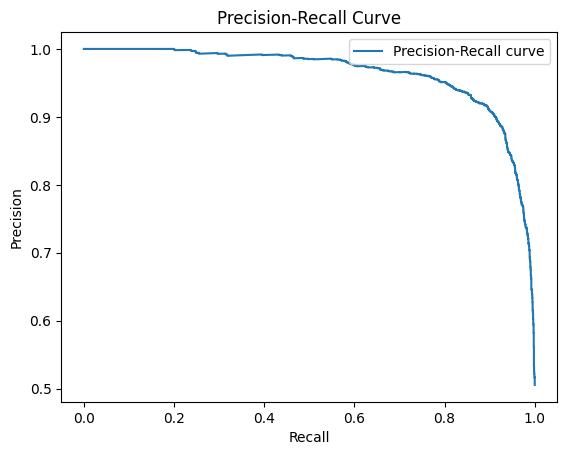

In [ ]:
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [ ]:
precision

array([0.50539996, 0.50549249, 0.50558506, ..., 1.        , 1.        ,
       1.        ])

In [ ]:
recall

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       7.24375226e-04, 3.62187613e-04, 0.00000000e+00])

In [ ]:
thresholds

array([0.00334718, 0.0033723 , 0.00337472, ..., 0.9961665 , 0.9961892 ,
       0.9962501 ], dtype=float32)

In [ ]:
target_values = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for target_precision in target_values:
  best_threshold = None

  for i in range(len(thresholds)):
      if precision[i] > target_precision:
          if best_threshold is None or recall[i] > recall[np.where(thresholds == best_threshold)][0]:
              best_threshold = thresholds[i]

  print(f"The best threshold for high precision above {target_precision} is: {best_threshold}")

The best threshold for high precision above 0.9 is: 0.19897355139255524
The best threshold for high precision above 0.91 is: 0.27120429277420044
The best threshold for high precision above 0.92 is: 0.3702801764011383
The best threshold for high precision above 0.93 is: 0.5002533793449402
The best threshold for high precision above 0.94 is: 0.6852285265922546
The best threshold for high precision above 0.95 is: 0.7333531975746155
The best threshold for high precision above 0.96 is: 0.8319993019104004
The best threshold for high precision above 0.97 is: 0.9539918899536133
The best threshold for high precision above 0.98 is: 0.9765724539756775
The best threshold for high precision above 0.99 is: 0.9898456335067749




---



# Threshold Verification

In [ ]:
# Obtained from previous calculations above
precision_threshold = 0.7333531975746155

predicted_labels = [1 if pred_prob > precision_threshold else 0 for pred_prob in pos_probs]

# predicted_labels

In [ ]:
true_labels = [example['label'] for example in dataset['validation']]
# true_labels

### Confusion Matrix

[[2586  116]
 [ 543 2218]]


<Axes: >

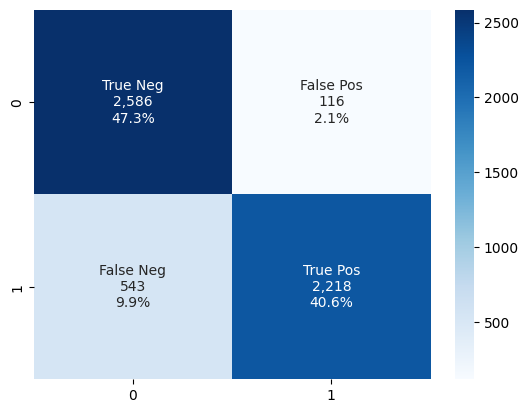

In [ ]:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Confusion_Matrix = confusion_matrix(true_labels, predicted_labels)
print(Confusion_Matrix)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{:,}".format(value) for value in Confusion_Matrix.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in Confusion_Matrix.flatten()/np.sum(Confusion_Matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(Confusion_Matrix, annot=labels, fmt='', cmap='Blues')



---



### F1 Score, Precision, and Recall

In [ ]:
F1_Score = f1_score(true_labels, predicted_labels)
Precision = precision_score(true_labels, predicted_labels)
Recall = recall_score(true_labels, predicted_labels)

accuracy = accuracy_score(true_labels, predicted_labels)

tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
specificity = tn / (tn + fp)

print("F1 Score:\t", round(F1_Score, 4))
print("Precision:\t", round(Precision, 4))
print("Recall:\t\t", round(Recall, 4))
print("Accuracy:\t", round(accuracy, 4))
print("Specificity:\t", round(specificity, 4))



F1 Score:	 0.8707
Precision:	 0.9503
Recall:		 0.8033
Accuracy:	 0.8794
Specificity:	 0.9571




---



### Improvement Strategies



---

